<a href="https://colab.research.google.com/github/Nlamje45/AI-Projects/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction </u></b>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description
Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV



*   **Importing data**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data_cardiovascular_risk.csv", encoding= 'unicode_escape')
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create an Excel spreadsheet with the following columns:



*   **Variable** - Variable name.

*   **Type** - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.

*   **Expectation** - Our expectation about the variable influence in **'TenYearCHD'**.
*   **Conclusion** - Our conclusions about the importance of the variable, after we give a quick look at the data.


*   **Comments** - Any general comments that occured to us.









## Understanding of Data

In [ ]:
##### Data_filter Module
#     we have created three modules 1. Data_filter 2. EDA  3. Machine Learning
#     Rather of calling these functions through three distinct scripts, we've placed them in these primary notebooks before using them to keep everything in one place.
#     For modularity, these scripts can be called individually.

# Missing Value Count Function
def show_missing(DataFrame):                                                                             # defining fucntion
    missing = DataFrame.columns[DataFrame.isnull().any()].tolist()
#     return missing

    # Missing data counts and percentage
    print('Missing Data Count')
    print(DataFrame[missing].isnull().sum().sort_values(ascending = False))                             # shows the count of missing values for a column
    print('--'*50)
    print('Missing Data Percentage')
    print(round(DataFrame[missing].isnull().sum().sort_values(ascending = False)/len(DataFrame)*100,2)) # shows the percentage of missing values out of whole DataFrame 
#-----------------------------------------------------------------------------------------------------------------------------#
# Functions to impute NULL values

def impute_nan_mean(df,variable):                                               # This will impute NULL values in a column with mean of column values.
    df[variable].fillna(df[variable].mean(),inplace = True)
    
def impute_nan_median(df,variable):                                             # This will impute NULL values in a column with median of column values.
    df[variable].fillna(df[variable].median(),inplace = True)
    
def drop_column(df,variable):                                                   # This will drop the columns which we dont require.
    df.drop([variable],axis=1,inplace = True)
#-----------------------------------------------------------------------------------------------------------------------------#
# Functions to find Categorical and Numerical Columns in a DataFrame

def Categorical_columns(df):                                                    # to see all Categorical Columns.
    Categorical_columns = df.iloc[:,:]
    discrete_cat = []
    for var in Categorical_columns:
        if len(df[var].unique())<20:
            print(var, ' values: ', df[var].unique())
            discrete_cat.append(var)    
    print('There are {} Categorical columns'.format(len(discrete_cat)))
      
def Numerical_columns(df):                                                      # to see all Numerical Columns.
    Numerical_columns = df.iloc[:,:]
    discrete_num = []
    for var in Numerical_columns:
        if len(df[var].unique())>10:
            print(var)
            discrete_num.append(var)
    print('There are {} Numerical columns'.format(len(discrete_num)))
#-----------------------------------------------------------------------------------------------------------------------------#

In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

**Observations**-
* Seven columns in the data contain NULL values.
* We can 'id' and 'education' columns, as these are irrelevent for our analysis.
* 'heartRate','BMI', 'glucose' and 'cigsPerDay' will be imputed with mean.
* 'BPMeds' will be imputed with median and leftover rows with NULL can be dropped from data.


In [ ]:
var_mean = ['heartRate','BMI', 'glucose', 'cigsPerDay' ]                        # NULL-valued columns that will be imputed with mean.
for var in var_mean:
        impute_nan_mean(df,var)
        
var_median  = ['BPMeds']                                                        # NULL-valued columns that will be imputed with mean.
for var in var_median:
        impute_nan_median(df,var)


var_drop = ['id','education']                                                   # NULL-valued columns to drop.
for var in var_drop:
        drop_column(df,var)

df.dropna(axis=0,inplace=True)

In [ ]:
df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

* No missing values are present in our Data.

In [ ]:
Numerical_columns(df)

age
cigsPerDay
totChol
sysBP
diaBP
BMI
heartRate
glucose
There are 8 Numerical columns


* There are 8 Numerical Columns.

In [ ]:
Categorical_columns(df)

sex  values:  ['F' 'M']
is_smoking  values:  ['YES' 'NO']
BPMeds  values:  [0. 1.]
prevalentStroke  values:  [0 1]
prevalentHyp  values:  [0 1]
diabetes  values:  [0 1]
TenYearCHD  values:  [1 0]
There are 7 Categorical columns


* There are 7 Categorical Columns.

# **Exploratory Data Analyis**

In [ ]:
##### EDA Module

# Function to make a list of all Categorical Columns.
def Categorical_columns_list(df):
    Categorical_columns = df.iloc[:,:]
    discrete_cat = []
    for var in Categorical_columns:
        if len(df[var].unique())<20:
            discrete_cat.append(var)
    return discrete_cat

# Function to make a list of all Numerical Columns.
def Numerical_columns_list(df):
    Numerical_columns = df.iloc[:,:]
    discrete_num = []
    for var in Numerical_columns:
        if len(df[var].unique())>10:
            discrete_num.append(var)
    return discrete_num
#-----------------------------------------------------------------------------------------------------------------------
# Function to generate plots of Categorical Columns for Univariate Analysis.
def univariate_categorical_EDA(df,discrete_cat):
    for col in discrete_cat:
        counts = df[col].value_counts().sort_index()
        import matplotlib.pyplot as plt 
        fig = plt.figure(figsize=(6, 5))
        ax = fig.gca()
        counts.plot.bar(ax = ax, color='steelblue')
        ax.set_title(col + ' counts')
        ax.set_xlabel(col) 
        ax.set_ylabel("Frequency")
    plt.show()

# Function to generate plots of Numerical Columns for Univariate Analysis.   
def univariate_numerical_EDA(df,discrete_num):
    for col in discrete_num:
        import matplotlib.pyplot as plt 
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        feature = df[col]
        feature.hist(bins=50, ax = ax)
        ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
        ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
        ax.set_title(col)
    plt.show()
#-----------------------------------------------------------------------------------------------------------------------    
def heat_map(df):
    corr = df.corr()
    import matplotlib.pyplot as plt 
    plt.figure(figsize=(15,10))
    import seaborn as sns 
    sns.heatmap(corr, annot=True, annot_kws={'size':15},cmap='coolwarm')

## Uni-variate Analysis

* In Univariate Analysis, we will first separate the columns on the basis of numerical features and categorical features and then do their count distribution.

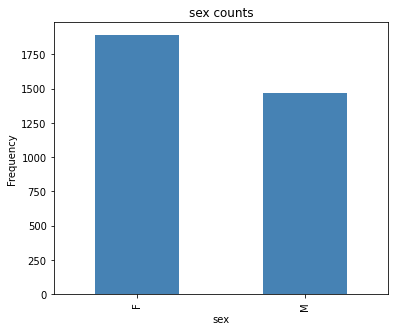

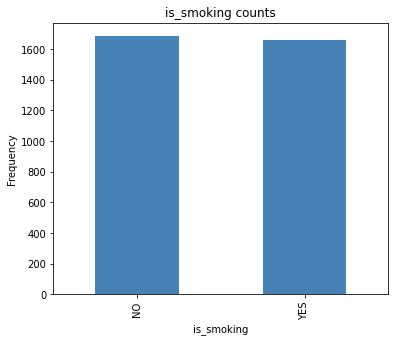

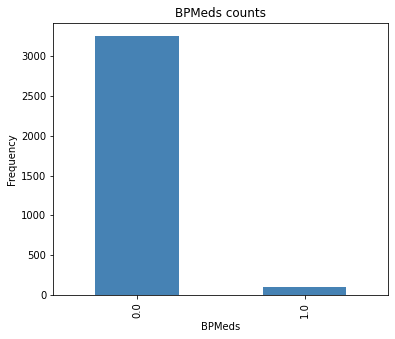

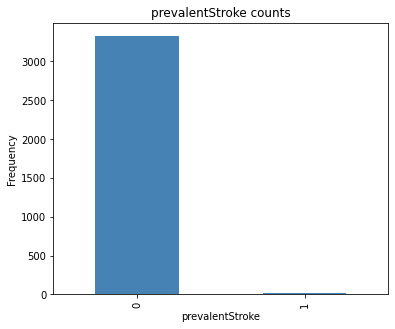

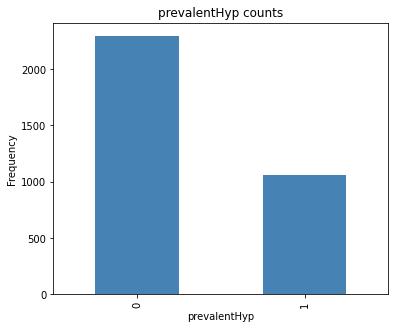

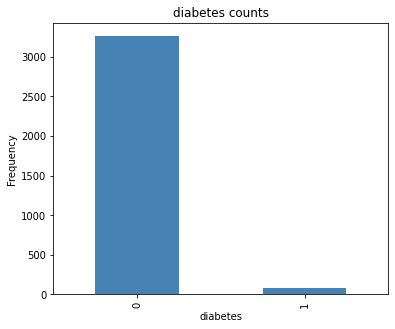

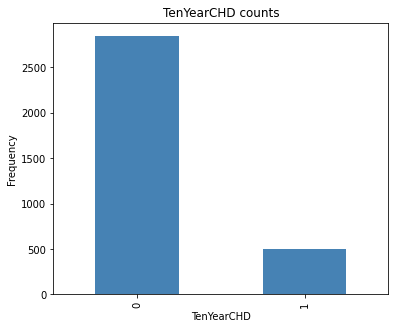

In [ ]:
list_cat = Categorical_columns_list(df)
univariate_categorical_EDA(df,list_cat)

Observations -

* Distribution of columns Sex, is_smoking and prevalentHYP seems normal.
* We see data imbalance in 'diabetes', 'prevalentstroke'. So we will check their co-relation and will drop any one of them.

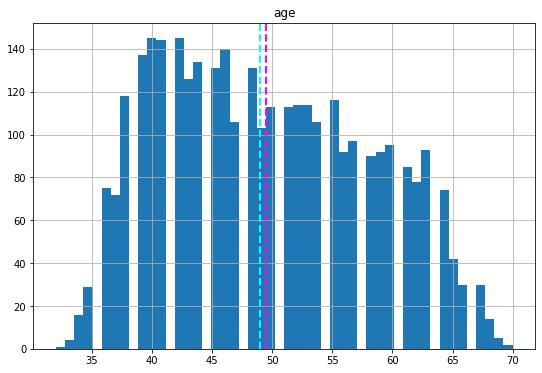

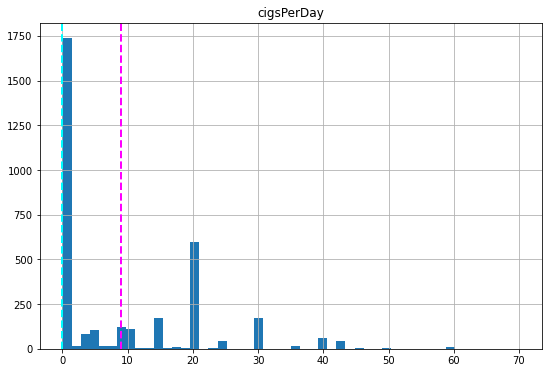

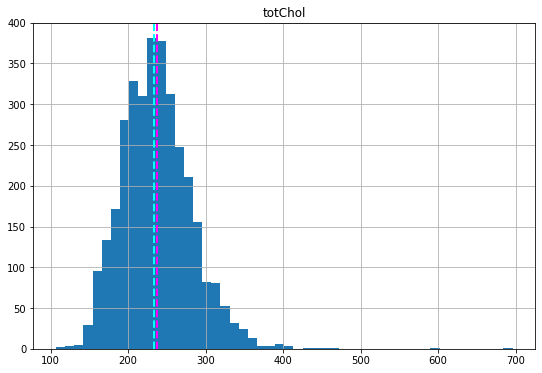

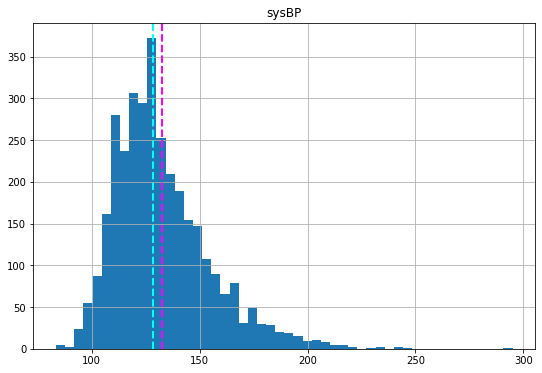

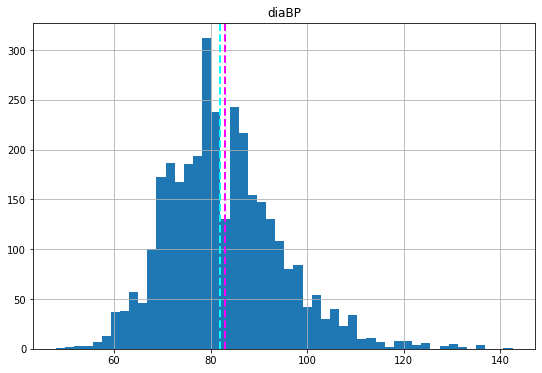

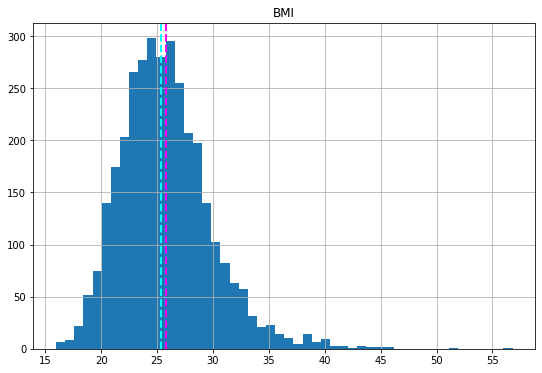

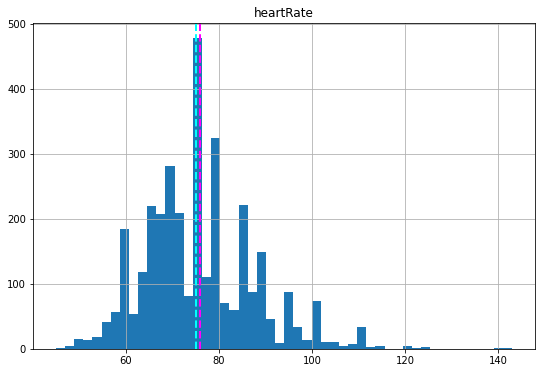

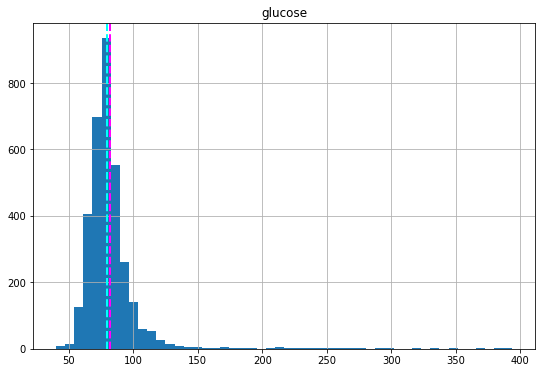

In [ ]:
list_num = Numerical_columns_list(df)
univariate_numerical_EDA(df,list_num)

**Observations** -

* Distribution of columns age, tolchol, sysBP, diaBP, BMI and Dew Heart rate seem normal.
* Distribution of columns Glucose is skwewed as the range of values is very less.

## Bi-variate and Multivariate Analysis

In [ ]:
import plotly.express as px
reoutput = {0: 'No heart disease', 1: 'Heart disease'}
df['TenYearCHD'] = df['TenYearCHD'].map(reoutput)

fig = px.pie(df['TenYearCHD'].value_counts().reset_index(), values = 'TenYearCHD', names = 'index', width = 500, height = 500)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#8d230f','#1e434c'], line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Distribution of <br> heart disease <br> in patients', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'black')],
                  showlegend = False)
reoutput = {'No heart disease': 0,'Heart disease': 1}
df['TenYearCHD'] = df['TenYearCHD'].map(reoutput)                  
fig.show()

In [ ]:
df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [ ]:
rcParams['figure.figsize'] = 15, 8
sns.countplot(x='age', hue='TenYearCHD', data = df, palette="Set2");

NameError: ignored

In [ ]:
d=d.drop(['id','education','is_smoking'],axis=1)

In [ ]:
d.describe()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


The difference between mean and median in column heartrate and bmi is small so 
we can replace null value with the column mean.

The difference between mean and median is too lage in glucose also the amount of null values also are more so we need to drop rows from column glucose containing null value



In [ ]:
d['heartRate'].fillna(t['heartRate'].mean(),inplace=True)
d['BMI'].fillna(t['BMI'].mean(),inplace=True)


NameError: ignored

In [ ]:
d.dropna(axis=0,inplace=True)
d.info()
d.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3004 entries, 1 to 3389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3004 non-null   int64  
 1   sex              3004 non-null   object 
 2   cigsPerDay       3004 non-null   float64
 3   BPMeds           3004 non-null   float64
 4   prevalentStroke  3004 non-null   int64  
 5   prevalentHyp     3004 non-null   int64  
 6   diabetes         3004 non-null   int64  
 7   totChol          3004 non-null   float64
 8   sysBP            3004 non-null   float64
 9   diaBP            3004 non-null   float64
 10  BMI              3004 non-null   float64
 11  heartRate        3004 non-null   float64
 12  glucose          3004 non-null   float64
 13  TenYearCHD       3004 non-null   int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 352.0+ KB


(3004, 14)

In [ ]:
d.isna().sum()

age                0
sex                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

No Null Data present



*   **Exploratory Data Analysis and Feature Engineering**



In [ ]:
t=d['TenYearCHD'].value_counts()
t

0    2547
1     457
Name: TenYearCHD, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


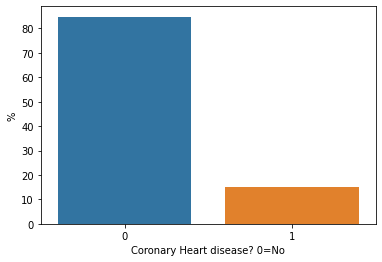

In [ ]:
t=d['TenYearCHD'].value_counts()
x=t.index
y=(t/t.sum())*100
ax=sns.barplot(x,y)
ax.set(xlabel='Coronary Heart disease? 0=No', ylabel="%")
plt.show()

EDA for Diabetes Column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


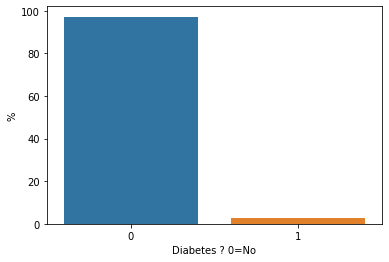

In [ ]:
t=d['diabetes'].value_counts()
x=t.index
y=(t/t.sum())*100
#plt.figure(figsize=(20,10))
ax=sns.barplot(x,y)
ax.set(xlabel='Diabetes ? 0=No', ylabel="%")
plt.show()

In [ ]:
t=d.groupby('cigsPerDay')['TenYearCHD'].sum()
t

cigsPerDay
0.0     211
1.0       7
2.0       2
3.0       8
4.0       0
5.0      12
6.0       3
7.0       3
8.0       0
9.0       7
10.0     14
11.0      1
12.0      1
13.0      0
15.0     23
16.0      0
17.0      0
18.0      2
19.0      0
20.0     94
23.0      1
25.0      8
30.0     29
35.0      3
38.0      0
40.0     15
43.0     11
45.0      0
50.0      1
60.0      1
70.0      0
Name: TenYearCHD, dtype: int64

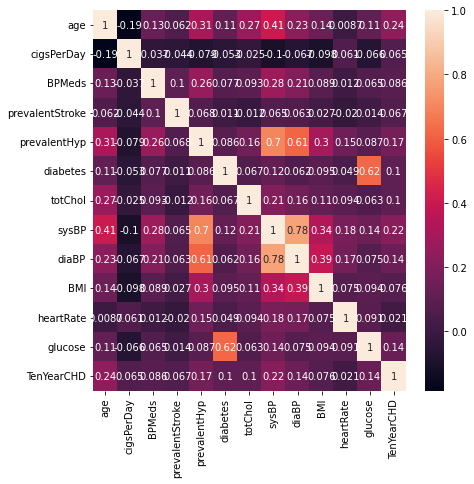

In [ ]:
co=t.corr()
plt.figure(figsize=(7,7))
g=sns.heatmap(t.corr(),annot=True)

columns sysBp and diaBp have high correlation so we can merge the two column into a single column and then drop both the columns

In [ ]:
t['Bp']=t['diaBP']+t['sysBP']
t

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Bp
0,64,F,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,233.0
1,36,M,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,266.0
2,46,F,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,187.0
3,50,M,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,246.0
4,64,F,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,221.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,F,0.0,0.0,0,1,0,217.0,182.0,86.0,26.980000,105.0,113.0,0,268.0
3385,60,F,0.0,0.0,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0,202.5
3386,46,F,0.0,0.0,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0,158.0
3387,44,M,3.0,0.0,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0,1,283.0


In [ ]:
t=t.drop(['sysBP','diaBP'],axis=1)
t

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,Bp
0,64,F,3.0,0.0,0,0,0,221.0,25.794964,90.0,80.0,1,233.0
1,36,M,0.0,0.0,0,1,0,212.0,29.770000,72.0,75.0,0,266.0
2,46,F,10.0,0.0,0,0,0,250.0,20.350000,88.0,94.0,0,187.0
3,50,M,20.0,0.0,0,1,0,233.0,28.260000,68.0,94.0,1,246.0
4,64,F,30.0,0.0,0,0,0,241.0,26.420000,70.0,77.0,0,221.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,F,0.0,0.0,0,1,0,217.0,26.980000,105.0,113.0,0,268.0
3385,60,F,0.0,0.0,0,0,0,261.0,29.280000,70.0,103.0,0,202.5
3386,46,F,0.0,0.0,0,0,0,199.0,21.960000,80.0,84.0,0,158.0
3387,44,M,3.0,0.0,0,1,0,352.0,28.920000,73.0,72.0,1,283.0


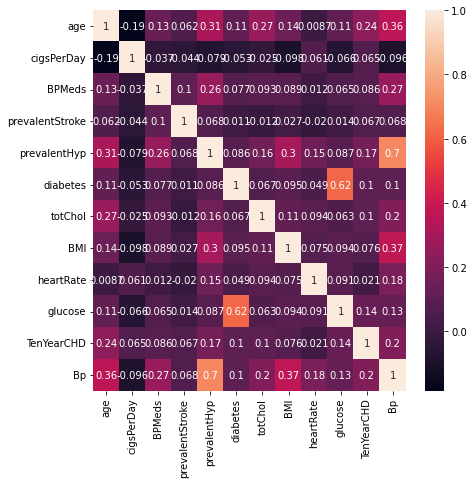

In [ ]:
co=t.corr()
plt.figure(figsize=(7,7))
g=sns.heatmap(t.corr(),annot=True)

Converting categorical feature Sex int numerical for model building using dummies

In [ ]:
dat=pd.get_dummies(t,drop_first=True)
dat

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,Bp,sex_M
0,64,3.0,0.0,0,0,0,221.0,25.794964,90.0,80.0,1,233.0,0
1,36,0.0,0.0,0,1,0,212.0,29.770000,72.0,75.0,0,266.0,1
2,46,10.0,0.0,0,0,0,250.0,20.350000,88.0,94.0,0,187.0,0
3,50,20.0,0.0,0,1,0,233.0,28.260000,68.0,94.0,1,246.0,1
4,64,30.0,0.0,0,0,0,241.0,26.420000,70.0,77.0,0,221.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,0.0,0.0,0,1,0,217.0,26.980000,105.0,113.0,0,268.0,0
3385,60,0.0,0.0,0,0,0,261.0,29.280000,70.0,103.0,0,202.5,0
3386,46,0.0,0.0,0,0,0,199.0,21.960000,80.0,84.0,0,158.0,0
3387,44,3.0,0.0,0,1,0,352.0,28.920000,73.0,72.0,1,283.0,1


The data is now ready for model building 

spliting the data for training and testing

In [ ]:
x=dat.drop(['TenYearCHD'],axis=1)
y=dat['TenYearCHD']

In [ ]:
from sklearn.model_selection import train_test_split
train_x,val_x,train_y,val_y=train_test_split(x,y,test_size=0.2)

**Model Building**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
m1=LogisticRegression(max_iter=10000)
m1.fit(train_x , train_y)
p1=m1.predict(val_x)
a1=accuracy_score(val_y,p1)
print(a1)

0.8576158940397351


In [ ]:
m2=DecisionTreeClassifier()
m2.fit(train_x,train_y)
p2=m2.predict(val_x)
a2=accuracy_score(val_y,p2)
print(a2)

0.7533112582781457


In [ ]:
m3=RandomForestClassifier(n_estimators=500)
m3.fit(train_x,train_y)
p3=m3.predict(val_x)
a3=accuracy_score(val_y,p3)
print(a3)

0.8625827814569537


In [ ]:
m4=SVC()
m4.fit(train_x,train_y)
p4=m4.predict(val_x)
a4=accuracy_score(val_y,p4)
print(a4)

0.859271523178808


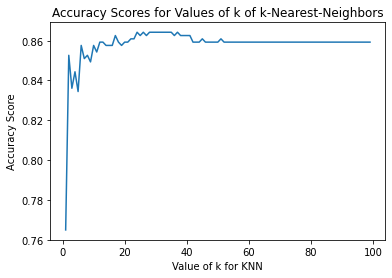

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
k_range = list(range(1,100))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x,train_y)
    y_pred = knn.predict(val_x)
    scores.append(metrics.accuracy_score(val_y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

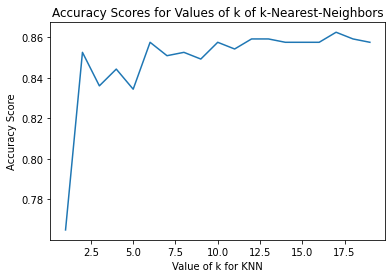

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
k_range = list(range(1,20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x,train_y)
    y_pred = knn.predict(val_x)
    scores.append(metrics.accuracy_score(val_y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
m5=KNeighborsClassifier(n_neighbors=10)
m5.fit(train_x,train_y)
p5=m5.predict(val_x)
a5=accuracy_score(val_y,p5)
print(a5)

0.8576158940397351


In [ ]:
m7=GaussianNB()
m7.fit(train_x,train_y)
p7=m7.predict(val_x)
a7=accuracy_score(val_y,p7)
print(a7)


0.8394039735099338


In [ ]:
m6=XGBClassifier()
m6.fit(train_x,train_y)
p6=m6.predict(val_x)
a6=accuracy_score(val_y,p6)
print(a6)

0.859271523178808


In [ ]:
params={
    "learning_rate":[0.05,0.10,0.15,0.2,0.25,0.3],
    "max_depth":[1,4,6,8,10,15] ,
    "min_child_weight":[1,3,5,7] ,
    "gamma":[0.1,0.2,0.3,0.4] ,
    "n_estimators":[100,200,300,400,500]
}
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
r_s=RandomizedSearchCV(m6,param_distributions=params,n_iter=5,n_jobs=-1)
r_s.fit(train_x,train_y)
r_s.best_params_
r_s.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.4,
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
m8=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

m8.fit(train_x,train_y)
p8=m8.predict(val_x)
a8=accuracy_score(val_y,p8)
print(a8)


0.8609271523178808


In [ ]:
params={

    "max_depth": [10, 20, 30, 40] ,
    'min_samples_leaf': [1, 2, 4] ,
    'min_samples_split': [2, 5, 10] ,
    "n_estimators":[1000,1500,2000]
}
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
r_s=GridSearchCV(m3,param_grid=params,n_jobs=-1)
r_s.fit(train_x,train_y)
r_s.best_params_
r_s.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)